# Portfolio creation tool
You can upload asstes/ stocks of your choice, choose timeframe and investment amount, and the tool will download data from yahoo finance, create portfolio based on three strategies and return recommended wights. I will also provide multiple visualisation and Monte Carlo simulations of future evolution of the portfolio.

##  Data analysis and visualisation part


In [1]:
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import datetime as dt
from datetime import datetime
import yfinance as yf
import seaborn as sns
import functools as reduce
from scipy import optimize
import warnings

# Import modules
import portfolio_optimization as pto
import EDA
import Portfolio_visualizations

## Portfolio Selection Functions

### Processing user input

In [6]:
# Specify the tickers:
user_input_str = input("Enter a list of tickers you want to analyze, separated by a comma only: ")
user_input_list = user_input_str.split(',')
invested_amount = float(input("Enter amount to invest in USD and press enter: "))

# Remove leading and trailing whitespaces from each string in the list:
tickers = [item.strip() for item in user_input_list]

# Take user input for start date and end date:
start_date_str = input("Enter the start date (YYYY-MM-DD): ")
end_date_str = input("Enter the end date (YYYY-MM-DD or 'today' if you want to the most recent data): ")

# Check if the user entered 'today' for end date and convert into datetime:
if end_date_str.lower() == 'today':
    end_date = datetime.today()
else:
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")

# Convert user input date strings to datetime objects:
start_date = datetime.strptime(start_date_str, "%Y-%m-%d")

# Create the adjusted close price dataframe:
adj_close_df = pd.DataFrame()

# Populate the dataframe with adjusted close price data of specified assets:
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    adj_close_df[ticker] = data["Adj Close"]
    
# Check for missing values in the dataframe:
if adj_close_df.isnull().values.any():
    print("Warning! Data for requested tickers are not available for the whole period. See more detailed into in following function analyze_dataset ")
else:
    print("Data downloaded successfully.")

Enter a list of tickers you want to analyze, separated by a comma only: M, HZO, HIBB, MELI, ATZ.TO, MNSO, ASO, DKS, XRT
Enter amount to invest in USD and press enter: 20000
Enter the start date (YYYY-MM-DD): 2022-01-01
Enter the end date (YYYY-MM-DD): today
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Warning! Data for requested tickers are not available for the whole period. See more detailed into in following function 

#### Some examples of stocks, that you can enter:
- top 10 biggest public tech companies by market cap: AAPL, NVDA, TSM, AVGO, ORCL, ADBE, ASML, CSCO, CRM

- some of the most popular retail stocks: M, HZO, HIBB, MELI, ATZ.TO, MNSO, ASO, DKS, XRT

- some of the largest energy companies (that do not focus maily on sustainable resouces): EQNR,BP,0857.HK,COP,FP.VI,SHEL,CVX,SR,ENEL.MI
  
- some of the biggest renewable Energy Companies in the World: AQN,BEPC,CEG,CSIQ,DQ,GE,IBDRY,JKS,NEE,VWDRY
#### Sample timeframe:
- start date: 2023-01-01
- end date: 2024-01-01

Shape of the DataFrame: (527, 9)
First 5 rows of the DataFrame:
                    M        HZO       HIBB         MELI     ATZ.TO  \
Date                                                                  
2022-01-03  25.453489  58.860001  69.624306  1332.939941        NaN   
2022-01-04  26.113533  59.070000  67.632545  1241.380005  52.880001   
2022-01-05  24.579628  57.639999  64.765221  1129.689941  51.150002   
2022-01-06  24.858521  58.000000  63.880009  1156.780029  51.180000   
2022-01-07  24.505257  56.500000  63.447021  1085.359985  50.310001   

                 MNSO        ASO         DKS        XRT  
Date                                                     
2022-01-03   9.901319  43.603260  109.024483  88.293533  
2022-01-04   9.699642  42.498631  106.273888  87.531898  
2022-01-05   9.401930  41.048805  101.515076  84.581718  
2022-01-06   9.690039  41.246063  102.923683  85.121605  
2022-01-07  10.083786  40.111835  104.037239  84.051430  
DataFrame Info:
<class 'pandas.c

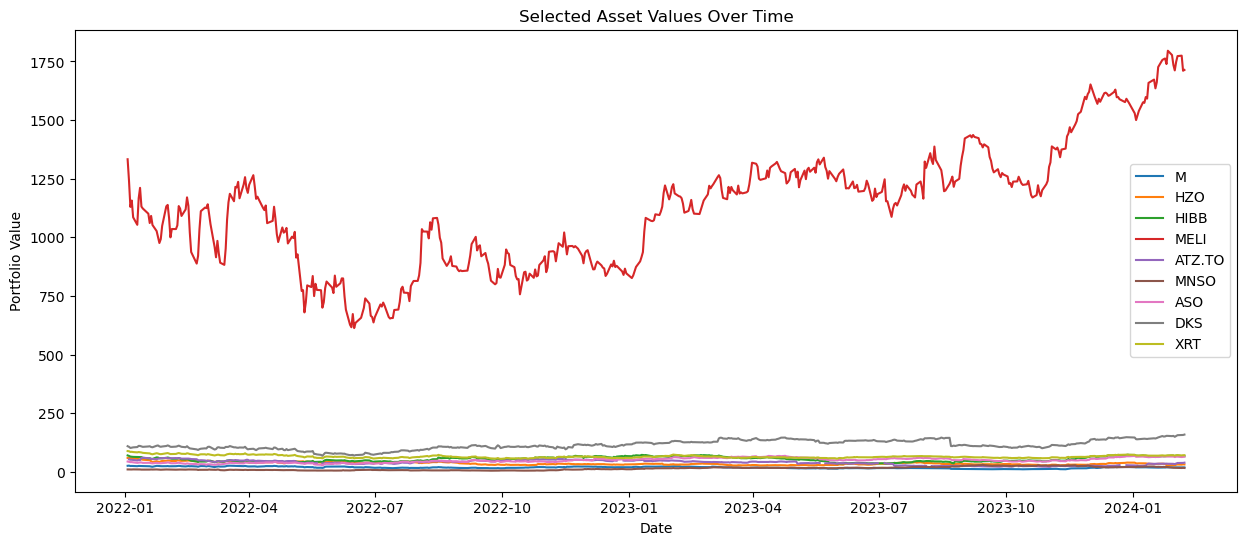

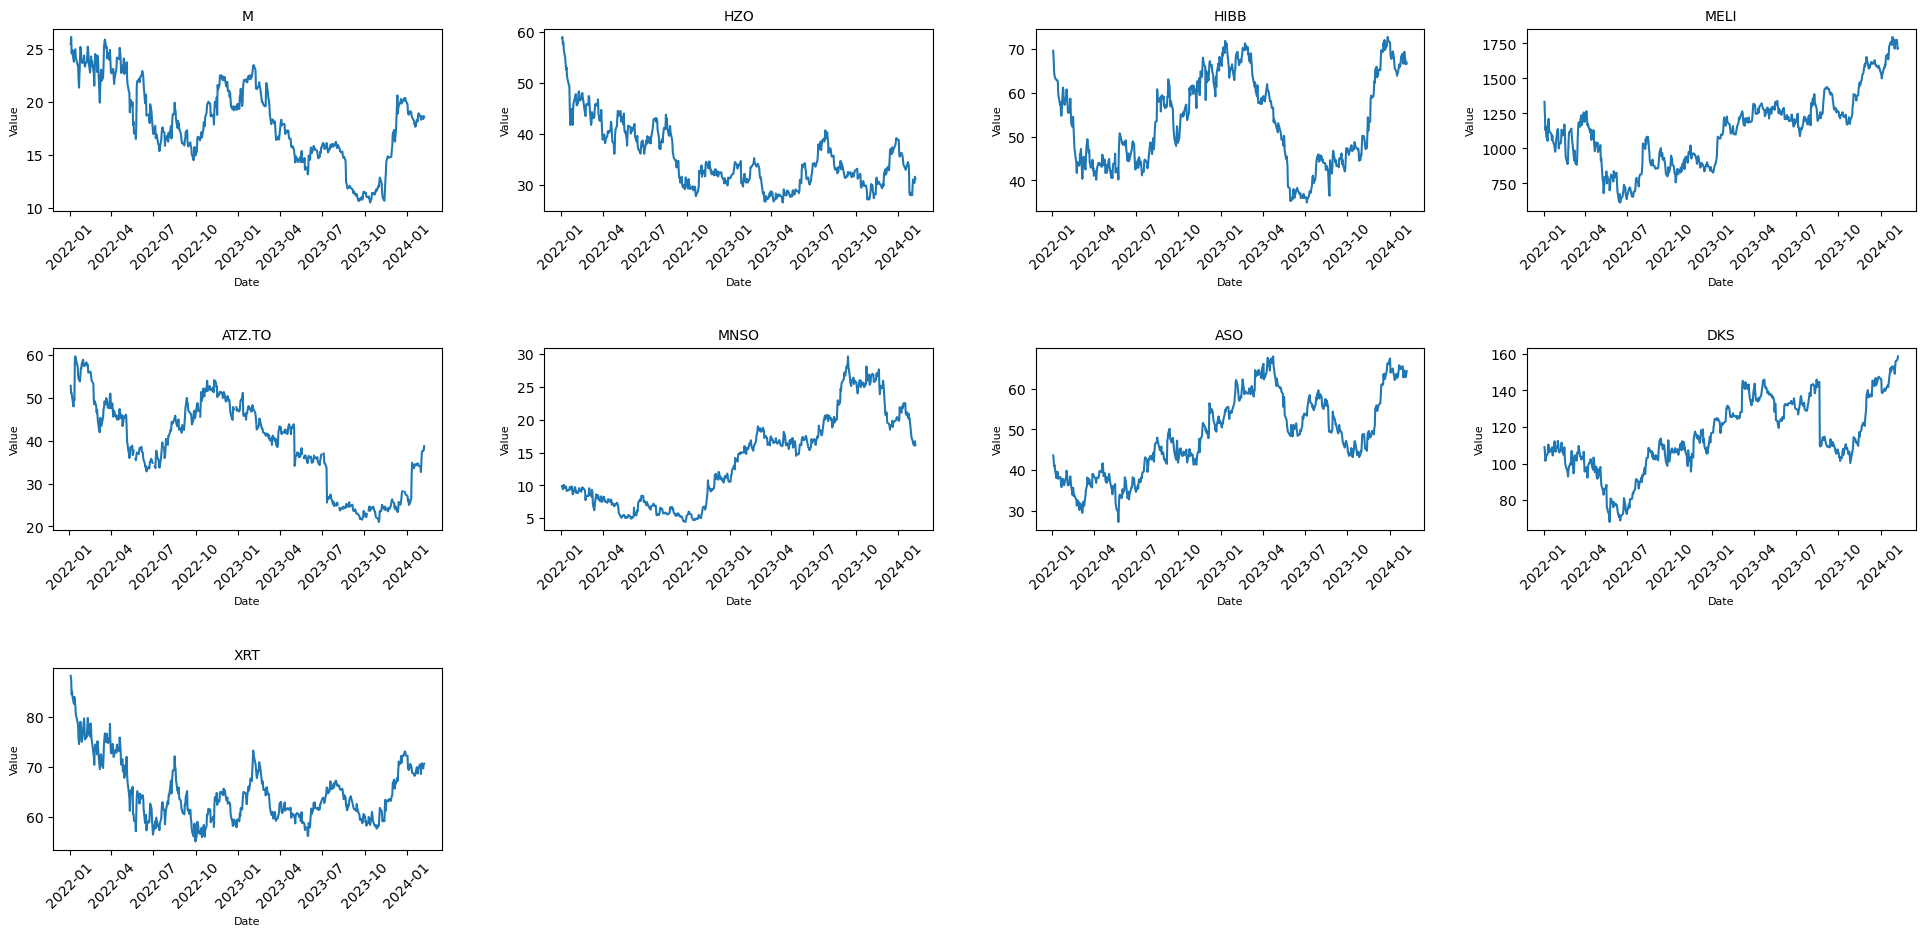

Box plot for distribution analysis


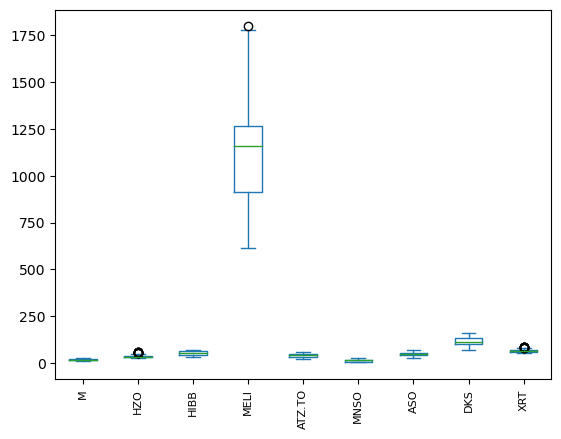

Heatmap for Correlation Between Assets


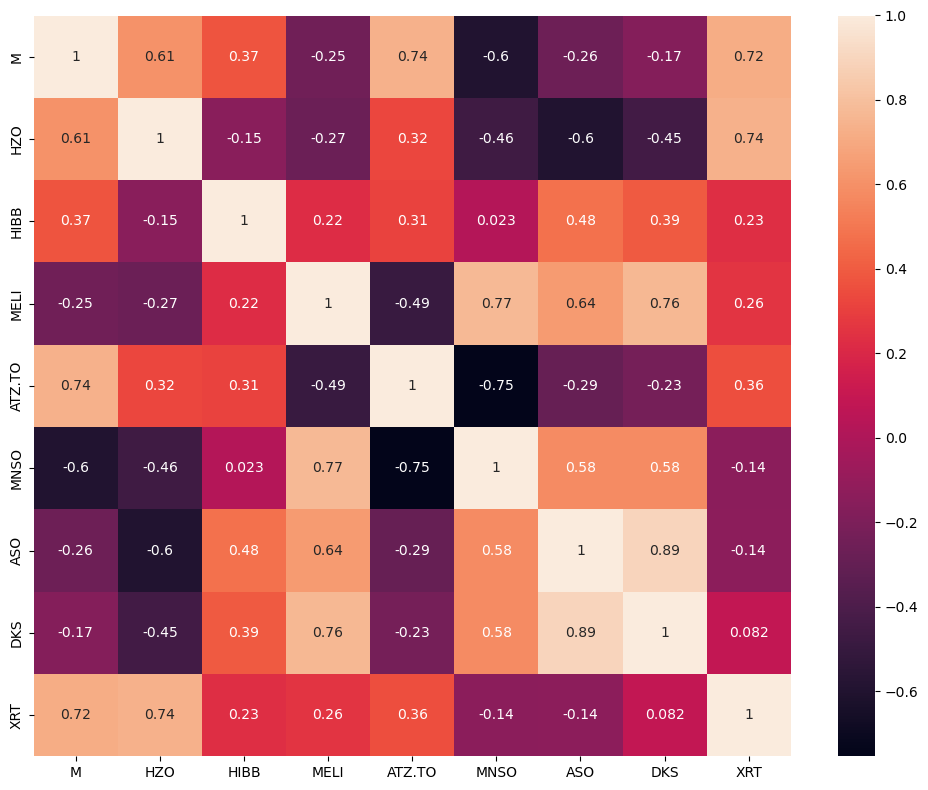

In [7]:
# Initial Analysis of the data
EDA.analyze_dataset(adj_close_df, summary_stat= True, data_quality = True, exploratory_analysis= True)

## Portfolio analysis

In this section, please insert the amount you want ton invest and press enter. The tool will use three different strategies how to build portfolio and graph the different combinations. 

#### Optimal weights of assets

Maxmimum Expected Return Method:
Expected Annual Return: 0.1611
Expected Volatility: 0.4169
Sharpe Ratio: 0.4345
Minimum Variance Method:
Expected Annual Return: -0.0205
Expected Volatility: 0.3349
Sharpe Ratio: -0.0015
Maximum Sharpe Ratio Method:
Expected Annual Return: 0.1553
Expected Volatility: 0.3951
Sharpe Ratio: 0.4437


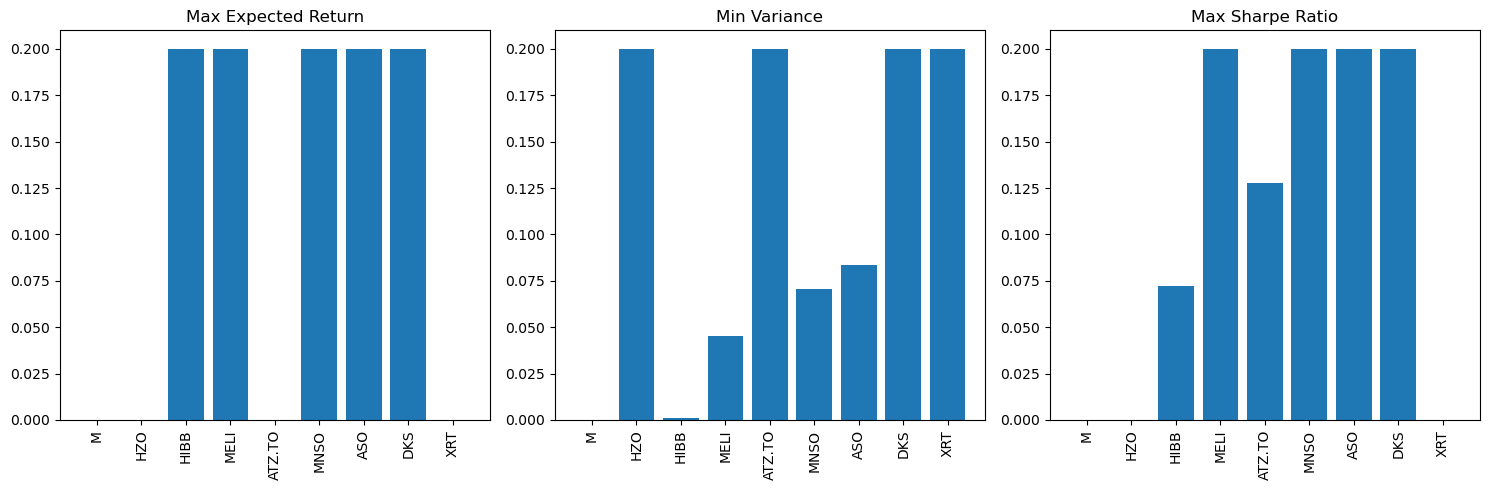

In [8]:
Portfolio_visualizations.optimal_weights_plot(adj_close_df, tickers)

#### Values of positions in the portfolio

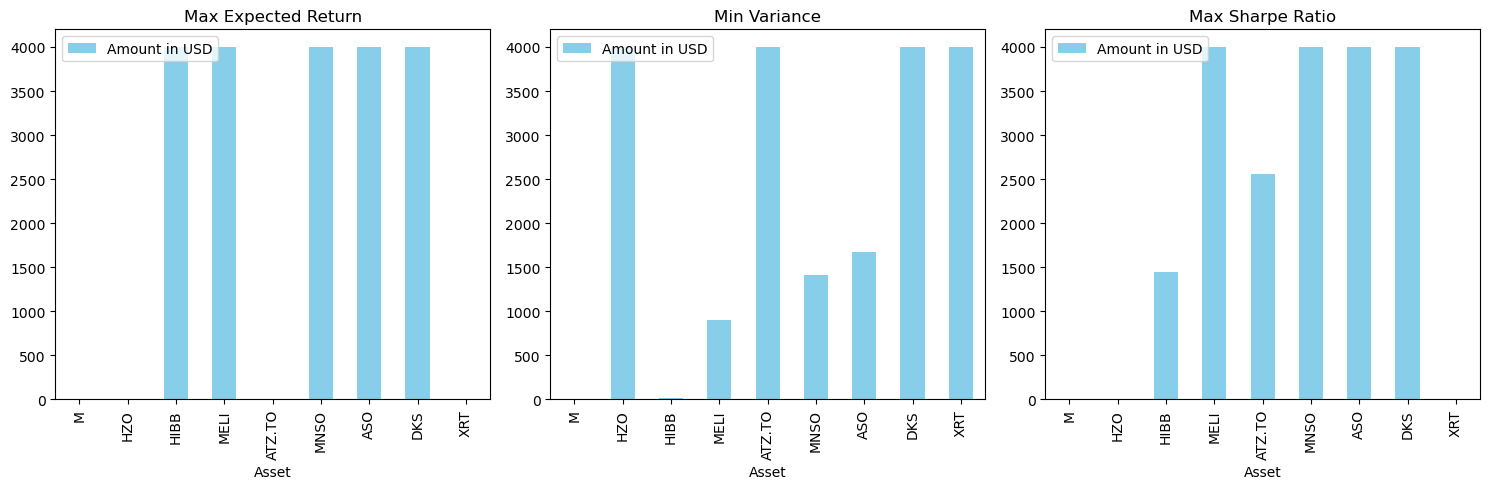

In [9]:
Portfolio_visualizations.portfolio_breakdown_plot(adj_close_df, invested_amount, tickers)

This is the end of the analysis, here we aim to  make monte carlo simulations of the  evolution of selected combinations of stocks.

### Theoretical portfolio 
Following lines of code assume you are buying the stocks at the beginning of the period based on the adjusted close prices of the stocks on the first day of your historical data set. This approach provides a straightforward way to understand how the portfolio would have performed historically given the initial weights calculated by our optimization methods

In [10]:
# Optimal portfolio information for max_exp_return
optimal_result_max_exp_return = pto.optimize_portfolio(adj_close_df, min_weight=0.0, max_weight=0.2, method="max_exp_return")
optimal_weights_max_exp_return = optimal_result_max_exp_return.x

# Optimal portfolio information for min_variance
optimal_result_min_variance = pto.optimize_portfolio(adj_close_df, min_weight=0.0, max_weight=0.2, method="min_variance")
optimal_weights_min_variance = optimal_result_min_variance.x

# Optimal portfolio information for max_sharpe
optimal_result_max_sharpe = pto.optimize_portfolio(adj_close_df, min_weight=0.0, max_weight=0.2, method="max_sharpe")
optimal_weights_max_sharpe = optimal_result_max_sharpe.x

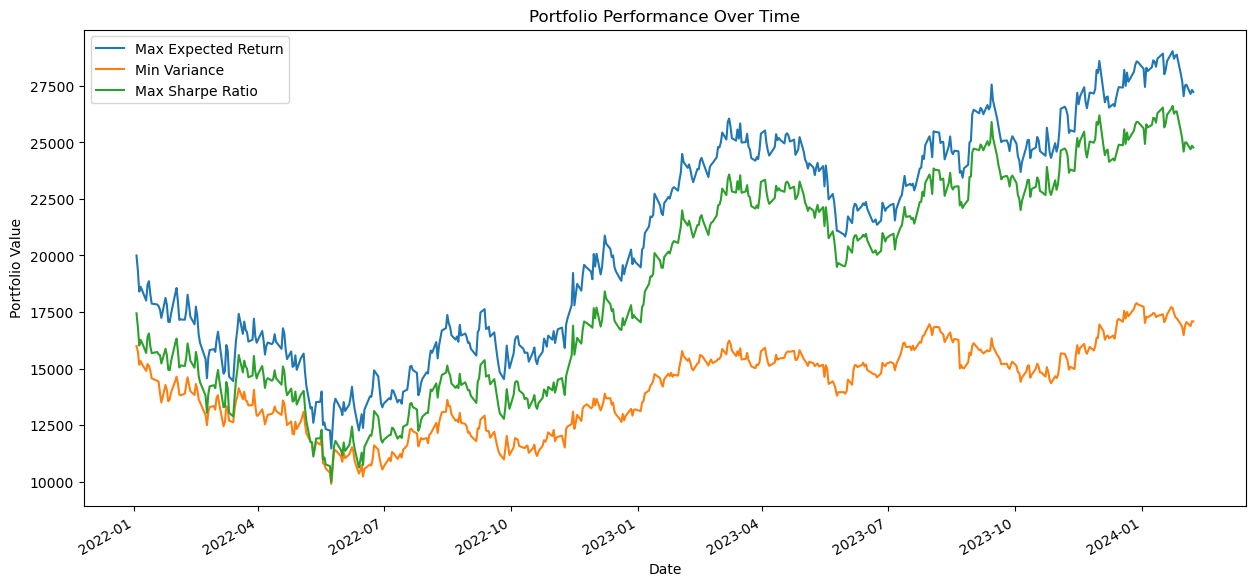

In [11]:
# Calculate the number of shares for each stock in the portfolio for each strategy
shares_max_exp_return = optimal_weights_max_exp_return * invested_amount / adj_close_df.iloc[0]
shares_min_variance = optimal_weights_min_variance * invested_amount / adj_close_df.iloc[0]
shares_max_sharpe = optimal_weights_max_sharpe * invested_amount / adj_close_df.iloc[0]

# Calculate the portfolio value over time for each strategy
portfolio_value_max_exp_return = (adj_close_df * shares_max_exp_return).sum(axis=1)
portfolio_value_min_variance = (adj_close_df * shares_min_variance).sum(axis=1)
portfolio_value_max_sharpe = (adj_close_df * shares_max_sharpe).sum(axis=1)

# Plot the portfolio values over time
plt.figure(figsize=(15, 7))
portfolio_value_max_exp_return.plot(label='Max Expected Return')
portfolio_value_min_variance.plot(label='Min Variance')
portfolio_value_max_sharpe.plot(label='Max Sharpe Ratio')
plt.title('Portfolio Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()


### Monte Carlo simulations

This script simulates the future value of your portfolio under each optimization strategy using Monte Carlo simulations. It assumes that the daily returns of the stocks are normally distributed and uses the historical mean and covariance of the log returns as parameters for the simulation. The final histogram plots show the distribution of the simulated portfolio values at the end of the simulation period, providing insight into the range of potential outcomes for each strategy.

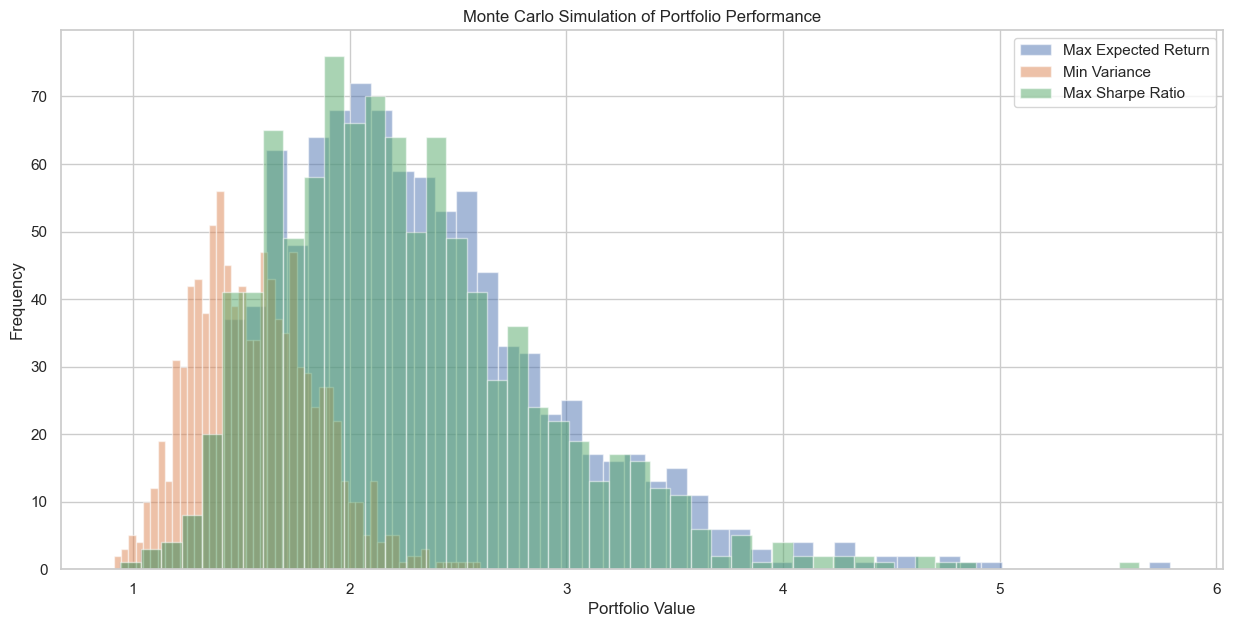

In [79]:
# Parameters
n_simulations = 1000  # Number of Monte Carlo simulations
n_days = 252  # Number of trading days in the future (e.g., 1 year)

# Historical log returns mean and covariance
mean_returns = log_returns.mean()
cov_matrix = log_returns.cov()

# Initialize arrays to store simulation results
simulated_portfolios_max_exp_return = np.zeros((n_simulations, n_days))
simulated_portfolios_min_variance = np.zeros((n_simulations, n_days))
simulated_portfolios_max_sharpe = np.zeros((n_simulations, n_days))

for i in range(n_simulations):
    # Generate random price paths for each stock
    daily_returns = np.random.multivariate_normal(mean_returns, cov_matrix, n_days)
    
    # Calculate the price paths
    price_paths = np.exp(daily_returns.cumsum(axis=0))
    
    # Calculate portfolio value for each strategy
    simulated_portfolios_max_exp_return[i, :] = (price_paths * optimal_weights_max_exp_return).sum(axis=1)
    simulated_portfolios_min_variance[i, :] = (price_paths * optimal_weights_min_variance).sum(axis=1)
    simulated_portfolios_max_sharpe[i, :] = (price_paths * optimal_weights_max_sharpe).sum(axis=1)

# Plotting the last day distribution for each strategy
plt.figure(figsize=(15, 7))

plt.hist(simulated_portfolios_max_exp_return[:, -1], bins=50, alpha=0.5, label='Max Expected Return')
plt.hist(simulated_portfolios_min_variance[:, -1], bins=50, alpha=0.5, label='Min Variance')
plt.hist(simulated_portfolios_max_sharpe[:, -1], bins=50, alpha=0.5, label='Max Sharpe Ratio')

plt.title('Monte Carlo Simulation of Portfolio Performance')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### More visualisations of the MC Simulations

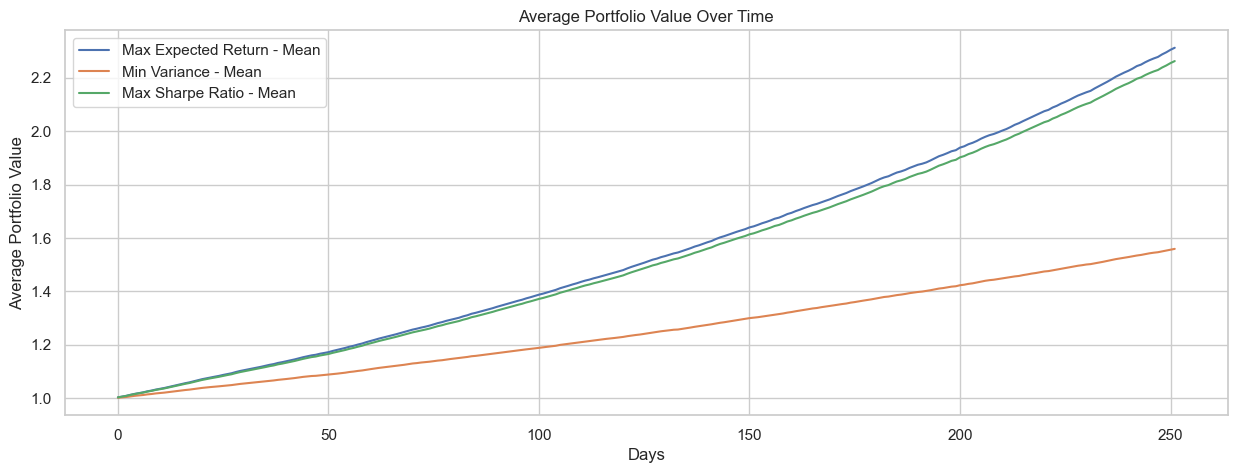

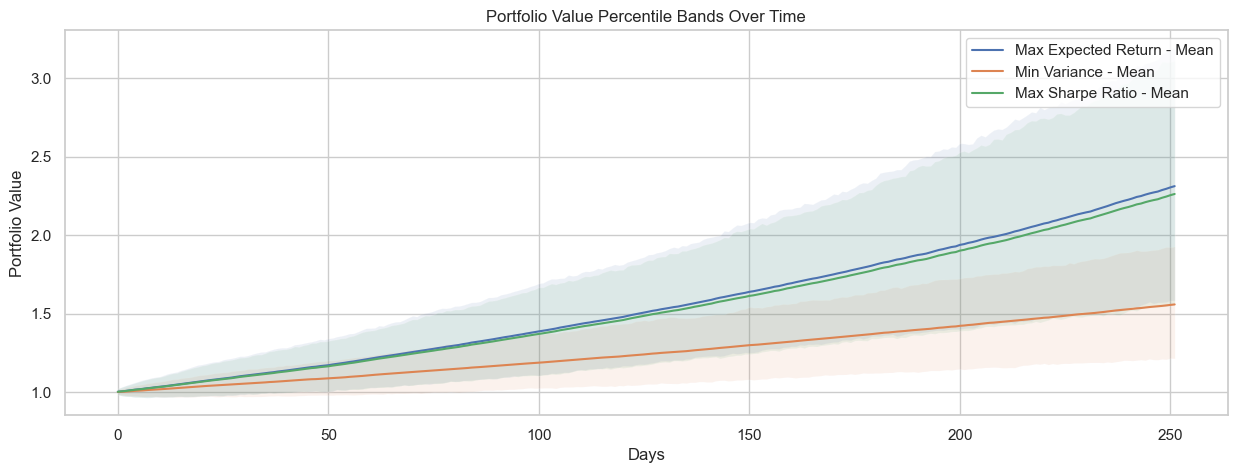

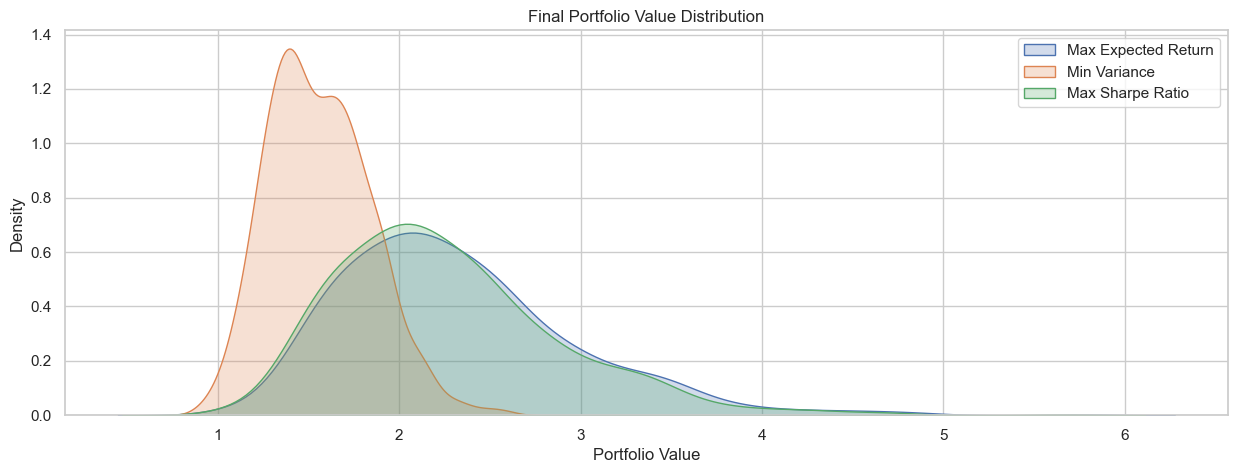

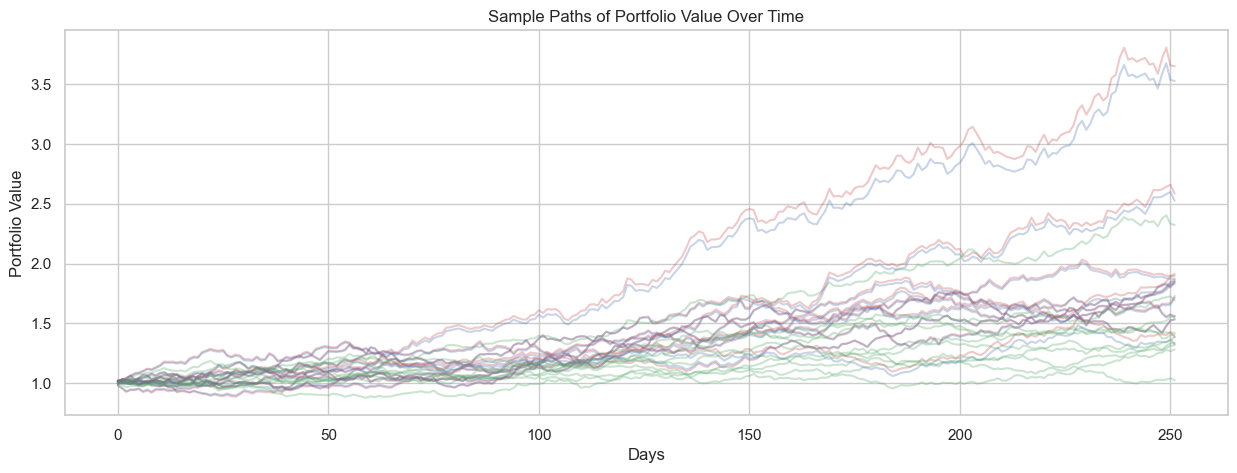

In [80]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

sns.set(style='whitegrid')

# 1. Average Portfolio Value Over Time
plt.figure(figsize=(15, 5))
plt.plot(simulated_portfolios_max_exp_return.mean(axis=0), label='Max Expected Return - Mean')
plt.plot(simulated_portfolios_min_variance.mean(axis=0), label='Min Variance - Mean')
plt.plot(simulated_portfolios_max_sharpe.mean(axis=0), label='Max Sharpe Ratio - Mean')
plt.title('Average Portfolio Value Over Time')
plt.xlabel('Days')
plt.ylabel('Average Portfolio Value')
plt.legend()
plt.show()

# 2. Percentile Bands of Portfolio Value
plt.figure(figsize=(15, 5))
for strategy, label in zip([simulated_portfolios_max_exp_return, simulated_portfolios_min_variance, simulated_portfolios_max_sharpe], 
                           ['Max Expected Return', 'Min Variance', 'Max Sharpe Ratio']):
    upper_band = np.percentile(strategy, 90, axis=0)
    lower_band = np.percentile(strategy, 10, axis=0)
    plt.fill_between(range(n_days), lower_band, upper_band, alpha=0.1)
    plt.plot(strategy.mean(axis=0), label=label + ' - Mean')
plt.title('Portfolio Value Percentile Bands Over Time')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

# 3. Final Portfolio Value Distribution with KDE
plt.figure(figsize=(15, 5))
sns.kdeplot(simulated_portfolios_max_exp_return[:, -1], label='Max Expected Return', fill=True)
sns.kdeplot(simulated_portfolios_min_variance[:, -1], label='Min Variance', fill=True)
sns.kdeplot(simulated_portfolios_max_sharpe[:, -1], label='Max Sharpe Ratio', fill=True)
plt.title('Final Portfolio Value Distribution')
plt.xlabel('Portfolio Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# 4. Overlay of Sample Paths
plt.figure(figsize=(15, 5))
for i in range(10):  # Plot 10 sample paths from each strategy
    plt.plot(simulated_portfolios_max_exp_return[i, :], 'r', alpha=0.3)
    plt.plot(simulated_portfolios_min_variance[i, :], 'g', alpha=0.3)
    plt.plot(simulated_portfolios_max_sharpe[i, :], 'b', alpha=0.3)
plt.title('Sample Paths of Portfolio Value Over Time')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.show()

end of code